In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import ast
import joblib

In [2]:
first_base = pd.read_csv('atbats_second_solo.csv')

first_base

,Unnamed: 0,Batter_name,Rbi_outcome,Rbi_stay,Success_steal,Success_stay,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs,dict_players,Date
0,0,Jacoby Ellsbury,1,0,0.45,0.15,2,3,4,8,False,True,1,"{'init': 0, 458731: 2}",2014-07-27
1,1,Charlie Blackmon,1,0,0.50,0.15,3,0,0,3,True,True,1,"{'init': 0, 592710: 2}",2014-08-01
2,2,Jacoby Ellsbury,1,1,0.45,0.15,2,0,0,3,True,False,2,"{'init': 0, 458731: 2}",2014-08-01
3,3,Jacoby Ellsbury,1,0,0.45,0.15,2,0,0,1,True,True,1,"{'init': 0, 458731: 2}",2014-08-01
4,4,Justin Upton,0,0,0.35,0.05,1,0,1,1,True,False,1,"{'init': 0, 518692: 2}",2014-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69450,69450,Francisco Alvarez,1,1,0.30,0.30,0,3,1,8,True,False,0,"{'init': 0, 621438: 2}",2024-09-30
69451,69451,Ramón Laureano,1,0,0.30,0.15,2,1,0,6,False,True,1,"{'init': 0, 624585: 2}",2024-09-30
69452,69452,Travis d'Arnaud,1,0,0.15,0.15,3,7,8,9,False,True,1,"{'init': 0, 642201: 2}",2024-09-30
69453,69453,Gio Urshela,1,1,0.15,0.15,1,1,0,2,False,False,1,"{'init': 0, 624585: 2}",2024-09-30


In [3]:
list(ast.literal_eval(first_base['dict_players'].tolist()[0]).keys())

['init', 458731]

In [4]:
first_base['runner_id'] = first_base['dict_players'].apply(lambda x: list(ast.literal_eval(x).keys())[-1])

In [5]:
first_base.head()

,Unnamed: 0,Batter_name,Rbi_outcome,Rbi_stay,Success_steal,Success_stay,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs,dict_players,Date,runner_id
0,0,Jacoby Ellsbury,1,0,0.45,0.15,2,3,4,8,False,True,1,"{'init': 0, 458731: 2}",2014-07-27,458731
1,1,Charlie Blackmon,1,0,0.50,0.15,3,0,0,3,True,True,1,"{'init': 0, 592710: 2}",2014-08-01,592710
2,2,Jacoby Ellsbury,1,1,0.45,0.15,2,0,0,3,True,False,2,"{'init': 0, 458731: 2}",2014-08-01,458731
3,3,Jacoby Ellsbury,1,0,0.45,0.15,2,0,0,1,True,True,1,"{'init': 0, 458731: 2}",2014-08-01,458731
4,4,Justin Upton,0,0,0.35,0.05,1,0,1,1,True,False,1,"{'init': 0, 518692: 2}",2014-08-02,518692


In [6]:
first_base

,Unnamed: 0,Batter_name,Rbi_outcome,Rbi_stay,Success_steal,Success_stay,Outs,homeScore,awayScore,inning,isTopInning,Isout,Current_outs,dict_players,Date,runner_id
0,0,Jacoby Ellsbury,1,0,0.45,0.15,2,3,4,8,False,True,1,"{'init': 0, 458731: 2}",2014-07-27,458731
1,1,Charlie Blackmon,1,0,0.50,0.15,3,0,0,3,True,True,1,"{'init': 0, 592710: 2}",2014-08-01,592710
2,2,Jacoby Ellsbury,1,1,0.45,0.15,2,0,0,3,True,False,2,"{'init': 0, 458731: 2}",2014-08-01,458731
3,3,Jacoby Ellsbury,1,0,0.45,0.15,2,0,0,1,True,True,1,"{'init': 0, 458731: 2}",2014-08-01,458731
4,4,Justin Upton,0,0,0.35,0.05,1,0,1,1,True,False,1,"{'init': 0, 518692: 2}",2014-08-02,518692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69450,69450,Francisco Alvarez,1,1,0.30,0.30,0,3,1,8,True,False,0,"{'init': 0, 621438: 2}",2024-09-30,621438
69451,69451,Ramón Laureano,1,0,0.30,0.15,2,1,0,6,False,True,1,"{'init': 0, 624585: 2}",2024-09-30,624585
69452,69452,Travis d'Arnaud,1,0,0.15,0.15,3,7,8,9,False,True,1,"{'init': 0, 642201: 2}",2024-09-30,642201
69453,69453,Gio Urshela,1,1,0.15,0.15,1,1,0,2,False,False,1,"{'init': 0, 624585: 2}",2024-09-30,624585


In [7]:
stolen_df = pd.read_csv('stolen_df_2.csv')
stolen_df

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Arm_Strength_3,Sprint_3,Result_4,Exchange_4,Arm_Strength_4,Sprint_4,Result_5,Exchange_5,Arm_Strength_5,Sprint_5
0,1,0.74,84.9,28.0,2021-04-01,545341,Randal Grichuk,1,0.74,84.9,...,84.9,27.0,0,0.74,84.9,27.7,0,0.74,84.9,25.0
1,0,0.75,81.4,27.3,2021-04-01,643565,Mike Tauchman,0,0.75,81.4,...,81.4,NaN,1,0.75,81.4,30.5,1,0.75,81.4,NaN
2,0,0.75,81.4,27.3,2021-04-01,643565,Mike Tauchman,0,0.75,81.4,...,81.4,NaN,1,0.75,81.4,30.5,1,0.75,81.4,NaN
3,0,0.73,79.0,27.9,2020-09-30,666185,Dylan Carlson,0,0.73,79.0,...,79.0,27.6,1,0.73,79.0,27.6,0,0.73,79.0,28.6
4,1,0.7,83.2,27.8,2020-09-30,502054,Tommy Pham,1,0.70,83.2,...,83.2,NaN,1,0.70,83.2,NaN,1,0.70,83.2,27.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37567,1,0.65,82.7,27.6,2016-04-09,500871,Eduardo Escobar,1,0.65,82.7,...,82.7,25.2,0,0.65,82.7,NaN,1,0.65,82.7,NaN
37568,1,0.75,80.1,28.4,2016-04-09,514888,Jose Altuve,1,0.75,80.1,...,80.1,26.3,1,0.75,80.1,27.9,0,0.75,80.1,26.3
37569,1,0.75,80.1,28.0,2016-04-09,543807,George Springer,1,0.75,80.1,...,80.1,26.3,1,0.75,80.1,27.9,0,0.75,80.1,26.3
37570,1,0.65,82.7,27.1,2016-04-08,572821,Brian Dozier,1,0.65,82.7,...,82.7,NaN,1,0.65,82.7,27.3,1,0.65,82.7,NaN


In [8]:
first_base = first_base.loc[first_base['Date'] > '2022-09-30']

In [9]:
stolen_df.sort_values(by='Date')

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Arm_Strength_3,Sprint_3,Result_4,Exchange_4,Arm_Strength_4,Sprint_4,Result_5,Exchange_5,Arm_Strength_5,Sprint_5
37571,1,0.67,81.2,28.0,2016-04-02,485567,Ezequiel Carrera,1,0.67,81.2,...,81.2,NaN,1,0.67,81.2,NaN,0,0.67,81.2,NaN
32330,1,0.67,81.2,28.0,2016-04-02,485567,Ezequiel Carrera,1,0.67,81.2,...,81.2,NaN,1,0.67,81.2,NaN,0,0.67,81.2,NaN
26536,1,0.67,81.2,28.0,2016-04-02,485567,Ezequiel Carrera,1,0.67,81.2,...,81.2,NaN,1,0.67,81.2,NaN,0,0.67,81.2,NaN
32329,1,0.65,82.7,27.1,2016-04-08,572821,Brian Dozier,1,0.65,82.7,...,82.7,NaN,1,0.65,82.7,27.3,1,0.65,82.7,NaN
37570,1,0.65,82.7,27.1,2016-04-08,572821,Brian Dozier,1,0.65,82.7,...,82.7,NaN,1,0.65,82.7,27.3,1,0.65,82.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26541,1,0.78,84.6,26.6,2023-09-30,666971,Lourdes Gurriel Jr.,1,0.69,85.4,...,85.4,NaN,1,0.69,85.4,NaN,1,0.69,85.4,29.6
26540,1,0.62,83.5,26.0,2023-09-30,663656,Kyle Tucker,1,0.62,83.5,...,83.5,29.3,1,0.62,83.5,28.5,0,0.62,83.5,27.7
26539,1,0.69,78.8,29.3,2023-09-30,686668,Brenton Doyle,1,0.60,79.5,...,79.5,29.6,1,0.60,79.5,27.1,0,0.60,79.5,29.2
26537,1,0.72,83.7,29.4,2023-09-30,665923,Esteury Ruiz,1,0.72,83.7,...,83.7,NaN,1,0.72,83.7,28.1,1,0.72,83.7,27.2


In [10]:
data_exp = {
    "Runners": ['0', "1", "2", "1,2", "3", "1,3", "2,3", "1,2,3"],
    "0 Outs": [0.461, 0.831, 1.068, 1.373, 1.426, 1.798, 1.920, 2.282],
    "1 Outs": [0.243, 0.489, 0.644, 0.908, 0.865, 1.140, 1.352, 1.520],
    "2 Outs": [0.095, 0.214, 0.305, 0.343, 0.413, 0.471, 0.570, 0.736],
}


exp_run_base = pd.DataFrame(data_exp)
exp_run_base

,Runners,0 Outs,1 Outs,2 Outs
0,0,0.461,0.243,0.095
1,1,0.831,0.489,0.214
2,2,1.068,0.644,0.305
3,"1,2",1.373,0.908,0.343
4,3,1.426,0.865,0.413
5,"1,3",1.798,1.140,0.471
6,"2,3",1.920,1.352,0.570
7,"1,2,3",2.282,1.520,0.736


In [43]:
stolen_subset = stolen_df[['Result', 'Date', 'runner_id']]

final_df = pd.merge(stolen_df, first_base, on=['Date', 'runner_id'], how='inner')

final_df.replace(' --', 0, inplace=True)

In [67]:

final_df['Rbi_steal_unique'] = final_df.apply(lambda x: 1 if x['Rbi_outcome'] == 1 and x['Rbi_stay'] == 0 else 0, axis=1)
final_df.sort_values(by='Date')

,index,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,...,dict_players,Past_Steal_Success,Simulated_out,Diff,Diff_transform,Utility_steal,Utility_caught,Utility_stay,Expected_Utils,Rbi_steal_unique
318,2324,1,0.78,81.2,27.2,2023-04-02,502054,Tommy Pham,1,0.68,...,"{'init': 0, 502054: 2}",1.000000e+00,3,4,0.028566,2.065000e-01,-0.000,0.06100,-0.007457,0
15,2317,1,0.75,77.3,28.7,2023-04-02,676801,Chas McCormick,0,0.69,...,"{'init': 0, 676801: 2}",1.090634e-12,3,-3,0.135335,6.756478e-14,-0.305,0.01525,-13.524037,0
14,2316,1,0.75,77.3,28.7,2023-04-02,676801,Chas McCormick,0,0.69,...,"{'init': 0, 676801: 2}",1.090634e-12,3,-3,0.135335,6.756478e-14,-0.305,0.01525,-13.524037,0
13,2318,1,0.75,77.3,28.7,2023-04-02,676801,Chas McCormick,0,0.69,...,"{'init': 0, 676801: 2}",1.090634e-12,3,-3,0.135335,6.756478e-14,-0.305,0.01525,-13.524037,0
12,2319,1,0.75,77.3,28.7,2023-04-02,676801,Chas McCormick,0,0.69,...,"{'init': 0, 676801: 2}",1.090634e-12,3,-3,0.135335,6.756478e-14,-0.305,0.01525,-13.524037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,16,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,...,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,2.595000e-01,-0.000,0.06440,0.071773,0
596,19,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,...,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,3.027500e-01,-0.000,0.09660,0.075838,1
597,23,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,...,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,3.027500e-01,-0.000,0.09660,0.075838,1
190,25,1,0.62,83.5,27.1,2023-09-29,514888,Jose Altuve,1,0.62,...,"{'init': 0, 514888: 2}",1.000000e+00,2,2,0.411112,1.297500e-01,-0.000,0.19320,-0.051451,1


In [45]:
X_scaler = joblib.load('deep_stolen_scale.pkl')

nn_model = joblib.load('deep_stolen.pkl')

In [46]:
X = final_df[['Exchange', 'Arm_Strength', 'Sprint', 'Result_1', 'Exchange_1',
       'Arm_Strength_1', 'Sprint_1', 'Result_2', 'Exchange_2',
       'Arm_Strength_2', 'Sprint_2', 'Result_3', 'Exchange_3',
       'Arm_Strength_3', 'Sprint_3', 'Result_4', 'Exchange_4',
       'Arm_Strength_4', 'Sprint_4', 'Result_5', 'Exchange_5',
       'Arm_Strength_5', 'Sprint_5']]

X_scaled = X_scaler.transform(X)

predictions = nn_model.predict(X_scaled)

final_df['Past_Steal_Success'] = predictions

16/73 [=====>........................] - ETA: 0s

2025-01-18 13:42:35.321185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


73/73 [==============================] - 0s 4ms/step


In [47]:


final_df['Simulated_out'] = final_df['Current_outs'] + 1

In [48]:
def utility_steal(x):
    
    if x["Current_outs"] in [0, 1]:
        
        utils = x['Past_Steal_Success'] * x['Success_steal'] * (exp_run_base.loc[(exp_run_base['Runners'] == "3")][f'{x["Current_outs"]} Out'].tolist()[0])
                                                                
    else:
        utils = x['Past_Steal_Success'] * x['Success_steal'] * (exp_run_base.loc[(exp_run_base['Runners'] == "3")][f'{x["Current_outs"]} Outs'].tolist()[0])
          
    return utils
                                                                
def utility_caught(x):
    
    if x["Simulated_out"] in [1, 2]:
        
        utils = (1 - x['Past_Steal_Success']) * (exp_run_base.loc[(exp_run_base['Runners'] == "0")][f'{x["Simulated_out"]} Outs'].tolist()[0] - exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Out'].tolist()[0])
                                                                
    else:
        utils = (1 - x['Past_Steal_Success']) * (exp_run_base.loc[(exp_run_base['Runners'] == "0")][f'{x["Simulated_out"]} Outs'].tolist()[0] - exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Outs'].tolist()[0]) 
          
    return utils
                                                 
def utility_stay(x):
    
    if x["Current_outs"] in [0, 1]:
        
        utils = (x['Success_stay']) * (exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Out'].tolist()[0])

                                                                
    else:
        utils = (x['Success_stay']) * (exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Out'].tolist()[0])
          
    return utils

In [49]:
final_df['Diff'] = final_df.apply(lambda x: x['awayScore'] - x['homeScore'] if x['isTopInning'] == 1 else x['homeScore'] - x['awayScore'], axis=1)


final_df['Diff_transform'] = final_df['Diff'].apply(lambda x: np.exp(-(x**2) / (2 * (1.5)**2)))

final_df['Utility_steal'] = final_df.apply(lambda x: x['Past_Steal_Success'] * x['Success_steal'] * (exp_run_base.loc[(exp_run_base['Runners'] == "3")][f'{x["Current_outs"]} Outs'].tolist()[0]), axis=1)

final_df['Utility_caught'] = final_df.apply(lambda x: (1 - x['Past_Steal_Success']) * (0 - exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Outs'].tolist()[0]) if x["Simulated_out"] == 3 else (1 - x['Past_Steal_Success']) * (exp_run_base.loc[(exp_run_base['Runners'] == "0")][f'{x["Simulated_out"]} Outs'].tolist()[0] - exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Outs'].tolist()[0]), axis=1)

final_df['Utility_stay'] = final_df.apply(lambda x: (x['Success_stay']) * (exp_run_base.loc[(exp_run_base['Runners'] == "2")][f'{x["Current_outs"]} Outs'].tolist()[0]), axis=1)


In [50]:
final_df

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Isout,Current_outs,dict_players,Past_Steal_Success,Simulated_out,Diff,Diff_transform,Utility_steal,Utility_caught,Utility_stay
0,0,0.71,86.2,28.5,2023-09-30,682928,CJ Abrams,1,0.69,84.8,...,True,1,"{'init': 0, 682928: 2}",1.0,2,-2,0.411112,0.38925,-0.0,0.1288
1,0,0.71,86.2,28.5,2023-09-30,682928,CJ Abrams,1,0.69,84.8,...,True,1,"{'init': 0, 682928: 2}",1.0,2,-2,0.411112,0.38925,-0.0,0.1288
2,1,0.71,79.0,27.7,2023-09-30,660670,Ronald Acuña Jr.,1,0.68,78.9,...,False,1,"{'init': 0, 660670: 2}",1.0,2,-2,0.411112,0.34600,-0.0,0.1288
3,1,0.71,79.0,27.7,2023-09-30,660670,Ronald Acuña Jr.,1,0.68,78.9,...,False,0,"{'init': 0, 660670: 2}",1.0,1,-1,0.800737,0.35650,-0.0,0.2136
4,1,0.71,79.0,27.7,2023-09-30,660670,Ronald Acuña Jr.,1,0.68,78.9,...,False,1,"{'init': 0, 660670: 2}",1.0,2,-2,0.411112,0.34600,-0.0,0.1288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,1,0.73,78.1,29.6,2023-04-01,677594,Julio Rodríguez,1,0.64,79.3,...,True,1,"{'init': 0, 677594: 2}",1.0,2,0,1.000000,0.17300,-0.0,0.0644
2328,1,0.7,80.3,28.0,2023-04-01,607043,Brandon Nimmo,1,0.70,80.3,...,True,1,"{'init': 0, 607043: 2}",1.0,2,2,0.411112,0.21625,-0.0,0.1288
2329,1,0.7,80.3,28.0,2023-04-01,607043,Brandon Nimmo,1,0.70,80.3,...,True,1,"{'init': 0, 607043: 2}",1.0,2,2,0.411112,0.21625,-0.0,0.1288
2330,1,0.79,80.3,27.7,2023-04-01,595909,Jake Cave,1,0.72,81.4,...,True,1,"{'init': 0, 595909: 2}",1.0,2,-2,0.411112,0.25950,-0.0,0.0322


In [51]:
final_df.dropna(inplace=True)
final_df

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Isout,Current_outs,dict_players,Past_Steal_Success,Simulated_out,Diff,Diff_transform,Utility_steal,Utility_caught,Utility_stay
8,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,85.4,...,False,1,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,2.595000e-01,-0.000,0.06440
9,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,85.4,...,True,1,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,2.162500e-01,-0.000,0.16100
10,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,85.4,...,True,1,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,2.595000e-01,-0.000,0.06440
11,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,85.4,...,True,1,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,3.027500e-01,-0.000,0.09660
12,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,85.4,...,False,1,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,2.595000e-01,-0.000,0.06440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,1,0.75,77.3,28.7,2023-04-02,676801,Chas McCormick,0,0.69,77.8,...,False,2,"{'init': 0, 676801: 2}",1.090634e-12,3,-3,0.135335,6.756478e-14,-0.305,0.01525
2322,1,0.78,81.2,27.2,2023-04-02,502054,Tommy Pham,1,0.68,82.2,...,False,2,"{'init': 0, 502054: 2}",1.000000e+00,3,4,0.028566,2.065000e-01,-0.000,0.06100
2323,1,0.78,81.2,27.2,2023-04-02,502054,Tommy Pham,1,0.68,82.2,...,True,1,"{'init': 0, 502054: 2}",1.000000e+00,2,4,0.028566,3.460000e-01,-0.000,0.03220
2324,1,0.78,81.2,27.2,2023-04-02,502054,Tommy Pham,1,0.68,82.2,...,False,2,"{'init': 0, 502054: 2}",1.000000e+00,3,4,0.028566,2.065000e-01,-0.000,0.06100


In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

final_df['Diff_transform'] = final_df['Diff'].apply(lambda x: np.exp(-(x**2) / (2 * (1.5)**2)))



In [53]:
final_df['Expected_Utils'] = final_df['Utility_steal'] * final_df['Diff_transform'] * np.exp(-final_df['Current_outs']) + final_df['Utility_caught'] * np.exp(final_df['Current_outs']) * final_df['inning'] - final_df['Utility_stay'] * np.exp(-final_df['Current_outs'])




In [54]:
final_df

,Result,Exchange,Arm_Strength,Sprint,Date,runner_id,runner_name,Result_1,Exchange_1,Arm_Strength_1,...,Current_outs,dict_players,Past_Steal_Success,Simulated_out,Diff,Diff_transform,Utility_steal,Utility_caught,Utility_stay,Expected_Utils
8,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,85.4,...,1,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,2.595000e-01,-0.000,0.06440,0.071773
9,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,85.4,...,1,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,2.162500e-01,-0.000,0.16100,0.020325
10,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,85.4,...,1,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,2.595000e-01,-0.000,0.06440,0.071773
11,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,85.4,...,1,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,3.027500e-01,-0.000,0.09660,0.075838
12,1,0.78,84.6,29.6,2023-09-29,682998,Corbin Carroll,1,0.69,85.4,...,1,"{'init': 0, 682998: 2}",1.000000e+00,2,0,1.000000,2.595000e-01,-0.000,0.06440,0.071773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,1,0.75,77.3,28.7,2023-04-02,676801,Chas McCormick,0,0.69,77.8,...,2,"{'init': 0, 676801: 2}",1.090634e-12,3,-3,0.135335,6.756478e-14,-0.305,0.01525,-13.524037
2322,1,0.78,81.2,27.2,2023-04-02,502054,Tommy Pham,1,0.68,82.2,...,2,"{'init': 0, 502054: 2}",1.000000e+00,3,4,0.028566,2.065000e-01,-0.000,0.06100,-0.007457
2323,1,0.78,81.2,27.2,2023-04-02,502054,Tommy Pham,1,0.68,82.2,...,1,"{'init': 0, 502054: 2}",1.000000e+00,2,4,0.028566,3.460000e-01,-0.000,0.03220,-0.008210
2324,1,0.78,81.2,27.2,2023-04-02,502054,Tommy Pham,1,0.68,82.2,...,2,"{'init': 0, 502054: 2}",1.000000e+00,3,4,0.028566,2.065000e-01,-0.000,0.06100,-0.007457


In [55]:
final_df = final_df.sort_values(by='Expected_Utils')
final_df = final_df.reset_index()

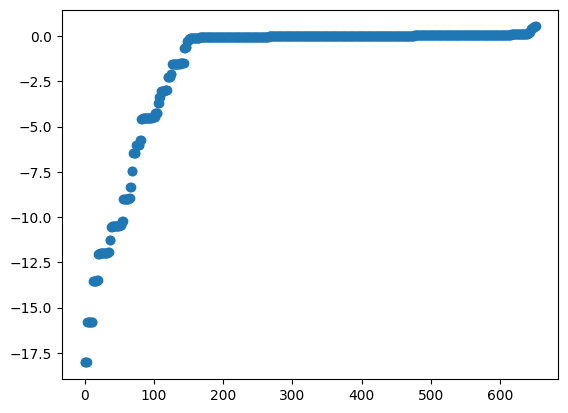

In [56]:
plt.scatter(x=final_df.index, y=final_df['Expected_Utils'])

In [68]:
# Above -1 util threshold

total_obs = len(final_df.loc[final_df['Expected_Utils'] > -1])
rbi_outcomes = final_df.loc[final_df['Expected_Utils'] > -1]['Rbi_steal_unique'].sum()
rbi_outcomes_stay = final_df.loc[final_df['Expected_Utils'] > -1]['Rbi_stay'].sum()
past_success_steal_prob = final_df.loc[final_df['Expected_Utils'] > -1]['Past_Steal_Success'].mean()

print(f'''Total Obs - {total_obs} with rbi outcomes - {rbi_outcomes} and prob of success of steal- {past_success_steal_prob} means that there is an  expected rbi return of {rbi_outcomes * past_success_steal_prob } this means you can expect a gain of {rbi_outcomes * past_success_steal_prob - rbi_outcomes_stay} RBis by choosing steal

With percentage of rbis gained per steal - {rbi_outcomes * past_success_steal_prob / total_obs}''')


Total Obs - 508 with rbi outcomes - 252 and prob of success of steal- 0.9989715814590454 means that there is an  expected rbi return of 251.74083852767944 this means you can expect a gain of 155.74083852767944 RBis by choosing steal

With percentage of rbis gained per steal - 0.4955528317474005


In [70]:
# Less than -1 threshold

total_obs = len(final_df.loc[final_df['Expected_Utils'] < -1])

rbi_outcomes = final_df.loc[final_df['Expected_Utils'] < -1]['Rbi_steal_unique'].sum()
rbi_outcomes_stay = final_df.loc[final_df['Expected_Utils'] < -1]['Rbi_stay'].sum()
past_success_steal_prob = final_df.loc[final_df['Expected_Utils'] < -1]['Past_Steal_Success'].mean()

print(f'''Total Obs - {total_obs} with rbi outcomes - {rbi_outcomes} and prob of success of steal- {past_success_steal_prob} means that there is an  expected rbi return of {rbi_outcomes * past_success_steal_prob } this means you can expect a gain of {rbi_outcomes * past_success_steal_prob - rbi_outcomes_stay} RBis by choosing steal or by choosing to stay gain {rbi_outcomes_stay} rbis

With percentage of rbis gained per steal - {rbi_outcomes * past_success_steal_prob / total_obs}''')


Total Obs - 144 with rbi outcomes - 48 and prob of success of steal- 0.043805208057165146 means that there is an  expected rbi return of 2.102649986743927 this means you can expect a gain of -31.897350013256073 RBis by choosing steal or by choosing to stay gain 34 rbis

With percentage of rbis gained per steal - 0.014601736019055048


In [71]:
# accuracy out of sample 

true_acc = 0.88

In [74]:
# Above -1 util threshold

total_obs = len(final_df.loc[final_df['Expected_Utils'] > -1])
rbi_outcomes = final_df.loc[final_df['Expected_Utils'] > -1]['Rbi_steal_unique'].sum()
rbi_outcomes_stay = final_df.loc[final_df['Expected_Utils'] > -1]['Rbi_stay'].sum()
past_success_steal_prob = true_acc

print(f'''Total Obs - {total_obs} with rbi outcomes - {rbi_outcomes} and prob of success of steal- {past_success_steal_prob} means that there is an  expected rbi return of {rbi_outcomes * past_success_steal_prob } this means you can expect a gain of {rbi_outcomes * past_success_steal_prob - rbi_outcomes_stay} RBis by choosing steal

With percentage of rbis gained per attempted steal - {rbi_outcomes * past_success_steal_prob / total_obs}''')


Total Obs - 508 with rbi outcomes - 252 and prob of success of steal- 0.88 means that there is an  expected rbi return of 221.76 this means you can expect a gain of 125.75999999999999 RBis by choosing steal

With percentage of rbis gained per attempted steal - 0.4365354330708661


In [75]:
# Less than -1 threshold

total_obs = len(final_df.loc[final_df['Expected_Utils'] < -1])

rbi_outcomes = final_df.loc[final_df['Expected_Utils'] < -1]['Rbi_steal_unique'].sum()
rbi_outcomes_stay = final_df.loc[final_df['Expected_Utils'] < -1]['Rbi_stay'].sum()
past_success_steal_prob = true_acc

print(f'''Total Obs - {total_obs} with rbi outcomes - {rbi_outcomes} and prob of success of steal- {past_success_steal_prob} means that there is an  expected rbi return of {rbi_outcomes * past_success_steal_prob } this means you can expect a gain of {rbi_outcomes * past_success_steal_prob - rbi_outcomes_stay} RBis by choosing steal or by choosing to stay gain {rbi_outcomes_stay} rbis

With percentage of rbis gained per attempted steal - {rbi_outcomes * past_success_steal_prob / total_obs}''')


Total Obs - 144 with rbi outcomes - 48 and prob of success of steal- 0.88 means that there is an  expected rbi return of 42.24 this means you can expect a gain of 8.240000000000002 RBis by choosing steal or by choosing to stay gain 34 rbis

With percentage of rbis gained per attempted steal - 0.29333333333333333
